# 1. Setting up

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits as digits
from sklearn import metrics

# 2. Inspecting the Data
We will look into identification of [digits](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html) from images of the digits - a classic classification problem.

In [58]:
digits = digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


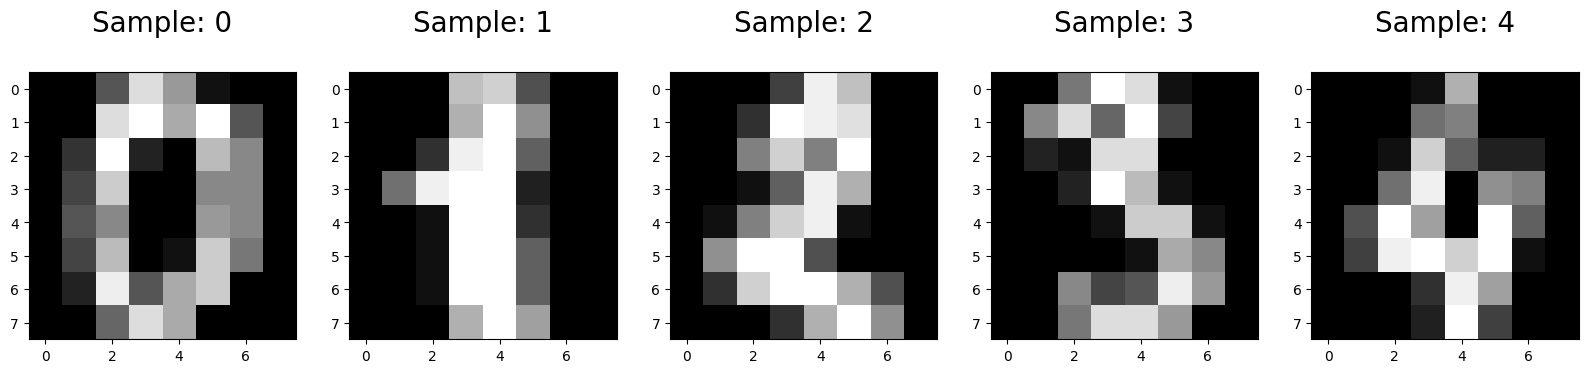

In [59]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Sample: %i\n' % label, fontsize = 20)

# 3. Pre-processing

In [60]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# 4. Creating and Training the Model

In [61]:
# Returns a NumPy Array
# Predict for One Observation (image). 
# Take the first image in the test set to predict and print the prediction

logisticRegr = LogisticRegression(C=1.0) # Note that C = 1 / lambda as per method de
logisticRegr.fit(x_train, y_train)

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

print(logisticRegr.predict_proba(x_test[0].reshape(1,-1)))

#Print the array of probability estimates for each possible class

[2]
[[2.94144731e-14 2.27360215e-12 9.99999999e-01 3.66991000e-11
  1.02714569e-16 3.93553574e-11 1.46475885e-18 6.21443164e-10
  4.92057130e-12 3.55231394e-15]]


/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predict for Multiple Observations (images) at once. Take the first 10 images in the test set to predict. 

In [62]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

Predict for the entire data set

In [63]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 9 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 1 1 5 5 9 1 3 7 0 0 3 0 4 5 8 9 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


# 5. Measuring Classification Performance

In [64]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [65]:
vals, counts = np.unique(y_train, return_counts=True)
index = np.argmax(counts)
print("Majority Class: ", vals[index])

Majority Class:  4


In [66]:
correct_count = 0
for y_val in y_test:
    if y_val == 4:
        correct_count += 1
print("Accuracy of Majority Class classifier: ", correct_count / len(y_test)) 

Accuracy of Majority Class classifier:  0.08444444444444445


### Confusion Matrix

In [67]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


A matrix using Seaborn

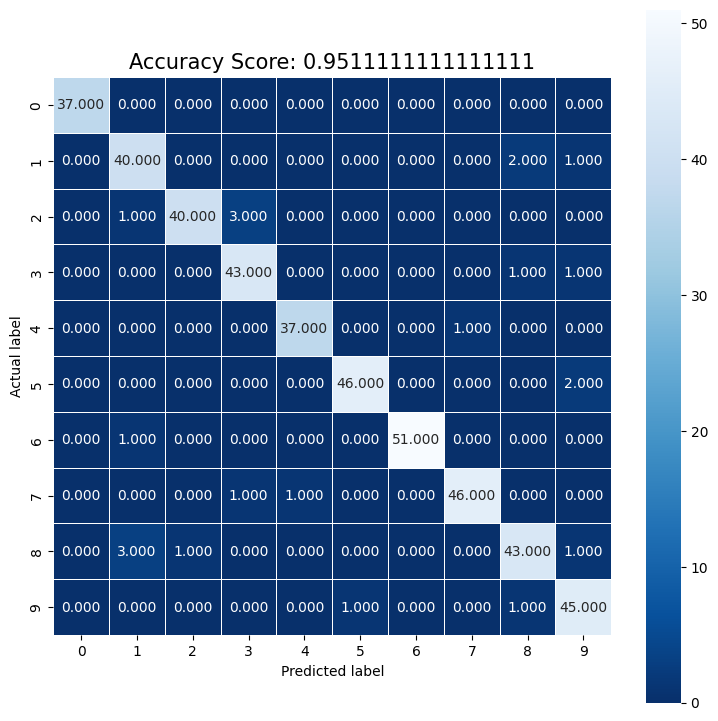

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

A matrix using Matplotlib

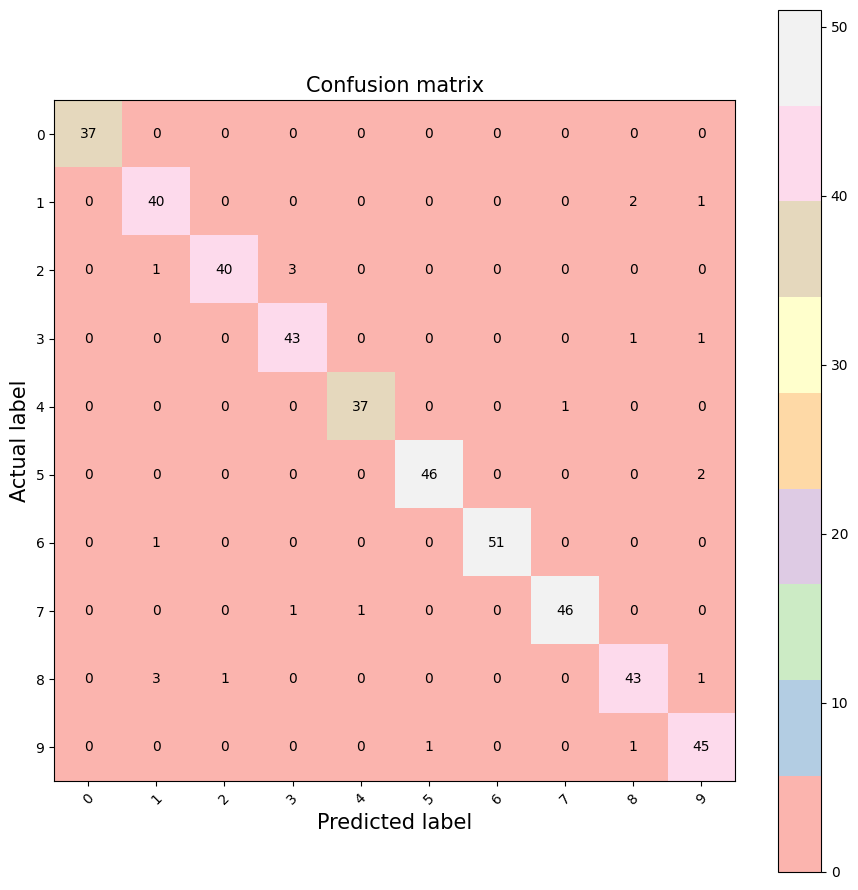

In [69]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

# 6. Using GridSearch

In [70]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,100,1000]}
# create a logistic regression model
lr = LogisticRegression(solver='liblinear')
# initialize grid search on the logistic regression model
grid_lr = GridSearchCV(lr, param_grid=grid_values)
# fit your training data using grid search
grid_lr.fit(x_train, y_train)

/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be

KeyboardInterrupt: 

In [ ]:
lr_score = grid_lr.score(x_test, y_test)
print(lr_score)

0.9622222222222222


In [ ]:
lr_y_pred = grid_lr.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score: 0.9622222222222222')

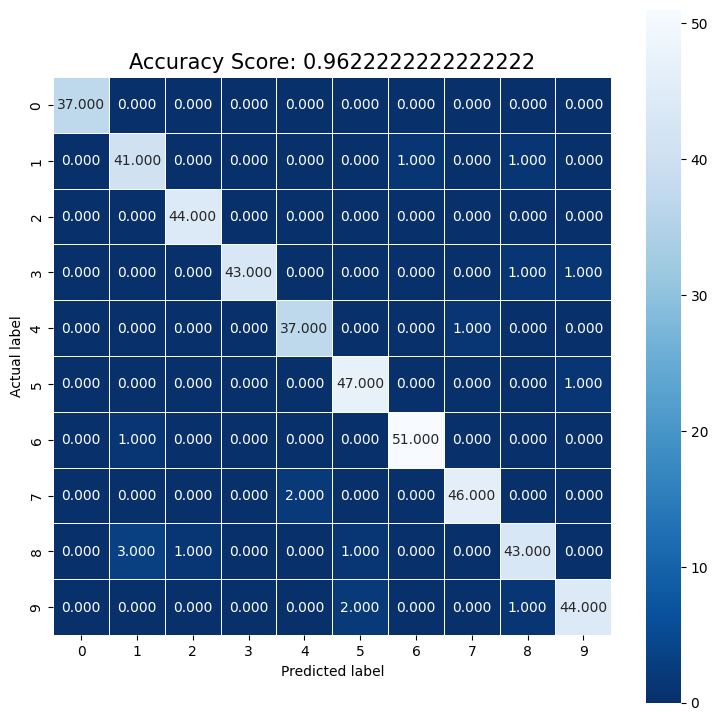

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr_score)
plt.title(all_sample_title, size = 15)

# 7. Tips
Let's do some brushing up on quick NumPy and Pandas commands.

In [ ]:
arr = np.array((23, 23, 55, 56, 10))

index = arr.argmin()
arr[index]

np.int64(10)

In [ ]:
data = {'Name':['Penny', 'Sebastian', 'Pam', 'Willy'], 'Nickname':['Penn', 'Seb', 'P', 'Will'], 'Age':[20, 21, 19, 18], 'Number of Pets':[2, 1, 3, 3]}
df = pd.DataFrame(data)

print(df)

        Name Nickname  Age  Number of Pets
0      Penny     Penn   20               2
1  Sebastian      Seb   21               1
2        Pam        P   19               3
3      Willy     Will   18               3


In [ ]:
df.nlargest(2, 'Number of Pets')['Name']

df.nsmallest(3, 'Age')['Nickname']

3    Will
2       P
0    Penn
Name: Nickname, dtype: object